# 3. 판다스 데이터 전처리 

## 3-1  데이터 확인하기 

### 모듈 사용하기 

In [1]:
import pandas as pd

In [2]:
import numpy as np

### 파일 읽어오기 

In [3]:
df = pd.read_csv("./data/train.csv")

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['SalePrice'].max(), df['SalePrice'].min()

(755000, 34900)

In [9]:
bins = pd.IntervalIndex.from_tuples([(0, 100000), (100001, 200000)
                                     ,(200001, 300000),(300001,400000)
                                     ,(400001,500000), (500001,600000)
                                     ,(600001,700000), (700001,800000)])

In [10]:
pd.cut(df['SalePrice'],bins,labels=False, retbins=True, right=False)[1]

IntervalIndex([(0, 100000], (100001, 200000], (200001, 300000], (300001, 400000], (400001, 500000], (500001, 600000], (600001, 700000], (700001, 800000]], dtype='interval[int64, right]')

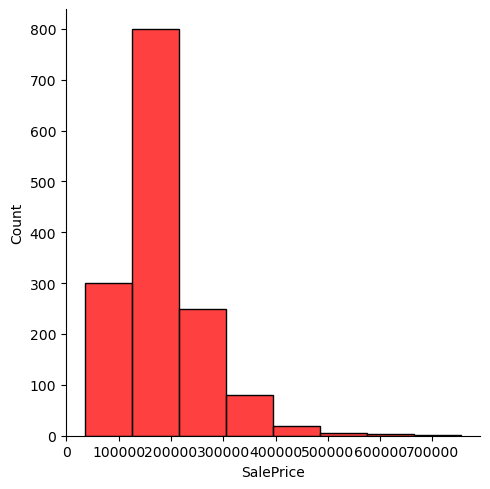

In [11]:
sns.displot(df['SalePrice'], bins=8,color='r')

### 데이터 상태 확인하기 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3-2  널값 처리 

### 널값을 확인하기 

In [13]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### 널값이 있는 경우만 칼럼추출하기 

In [14]:
df_col_null = df.columns[df.isna().sum() > 0 ]

In [15]:
df_col_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
df[df_col_null].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:
df[df_col_null].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

## 3-2 문자열 자료 변형하기

- 판다스는 칼럼으로 조회하면 .str 객체를 제공해서 문자열을 처리하는 다양한 메서드를 제공한다.


### 문자열 자료형 칼럼만 조회하기 

In [18]:
df_str = df.select_dtypes(include='object')

In [19]:
df_str.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### 성별 구분 확인하기

- 남성/여성이외의 값이 들어왔다. 

In [20]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [21]:
df['Alley'] = df['Alley'].fillna("NaN")

In [22]:
ss = df['Alley'].replace('NaN', 'other' )

In [23]:
ss.value_counts()

Alley
other    1369
Grvl       50
Pave       41
Name: count, dtype: int64

## 3-3 날짜 자료 변형하기 

- 날짜를 처리할 수 있도록 .dt 객체를 제공한다 

In [24]:
import datetime

### 날짜가 필요한 데이터를 읽기

In [25]:
df.insert(loc=0, column='date', value=datetime.datetime.now())

In [26]:
df['date']

0      2023-07-04 18:06:02.088084
1      2023-07-04 18:06:02.088084
2      2023-07-04 18:06:02.088084
3      2023-07-04 18:06:02.088084
4      2023-07-04 18:06:02.088084
                  ...            
1455   2023-07-04 18:06:02.088084
1456   2023-07-04 18:06:02.088084
1457   2023-07-04 18:06:02.088084
1458   2023-07-04 18:06:02.088084
1459   2023-07-04 18:06:02.088084
Name: date, Length: 1460, dtype: datetime64[ns]

In [27]:
df_day = df.copy()

### 데이터프레임 정보 확인하기 

In [28]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1460 non-null   datetime64[ns]
 1   Id             1460 non-null   int64         
 2   MSSubClass     1460 non-null   int64         
 3   MSZoning       1460 non-null   object        
 4   LotFrontage    1201 non-null   float64       
 5   LotArea        1460 non-null   int64         
 6   Street         1460 non-null   object        
 7   Alley          1460 non-null   object        
 8   LotShape       1460 non-null   object        
 9   LandContour    1460 non-null   object        
 10  Utilities      1460 non-null   object        
 11  LotConfig      1460 non-null   object        
 12  LandSlope      1460 non-null   object        
 13  Neighborhood   1460 non-null   object        
 14  Condition1     1460 non-null   object        
 15  Condition2     1460 n

### 칼럼에 대한 날짜 타입으로 변환한다

In [29]:
df_day['date'].dtype

dtype('<M8[ns]')

### 날짜 자료형으로 변환되어 dt 객체를 활용할 수 있다

In [30]:
df_day['date'].dt

In [31]:
df_day['date'].dt.date

0       2023-07-04
1       2023-07-04
2       2023-07-04
3       2023-07-04
4       2023-07-04
           ...    
1455    2023-07-04
1456    2023-07-04
1457    2023-07-04
1458    2023-07-04
1459    2023-07-04
Name: date, Length: 1460, dtype: object

### 새로운 칼럼 추가 

- dt 내의 날짜 관련 정보를 분리해서 새로운 칼럼을 만들기

In [32]:
df_day['year']       = df_day['date'].dt.year         # 연(4자리숫자)
df_day['month']      = df_day['date'].dt.month        # 월(숫자)
df_day['month_name'] = df_day['date'].dt.month_name() # 월(문자)

df_day['day']        = df_day['date'].dt.day          # 일(숫자)
df_day['time']       = df_day['date'].dt.time         # HH:MM:SS(문자)
df_day['hour']       = df_day['date'].dt.hour         # 시(숫자)
df_day['minute']     = df_day['date'].dt.minute       # 분(숫자)
df_day['second']     = df_day['date'].dt.second       # 초(숫자)


In [33]:
df_day.head()

,date,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,SaleCondition,SalePrice,year,month,month_name,day,time,hour,minute,second
0,2023-07-04 18:06:02.088084,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,Normal,208500,2023,7,July,4,18:06:02.088084,18,6,2
1,2023-07-04 18:06:02.088084,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,Normal,181500,2023,7,July,4,18:06:02.088084,18,6,2
2,2023-07-04 18:06:02.088084,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,Normal,223500,2023,7,July,4,18:06:02.088084,18,6,2
3,2023-07-04 18:06:02.088084,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,Abnorml,140000,2023,7,July,4,18:06:02.088084,18,6,2
4,2023-07-04 18:06:02.088084,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,Normal,250000,2023,7,July,4,18:06:02.088084,18,6,2


In [34]:
df_day.columns

Index(['date', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [35]:
df_day.select_dtypes(include='number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'year', 'month', 'day',
       'hour', 'minute', 'second'],
      dtype='object')

In [36]:
df_day.select_dtypes(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,year,month,day,hour,minute,second
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,2,2008,208500,2023,7,4,18,6,2
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,5,2007,181500,2023,7,4,18,6,2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,9,2008,223500,2023,7,4,18,6,2
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,2,2006,140000,2023,7,4,18,6,2
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,12,2008,250000,2023,7,4,18,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,8,2007,175000,2023,7,4,18,6,2
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,2,2010,210000,2023,7,4,18,6,2
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,2500,5,2010,266500,2023,7,4,18,6,2
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,4,2010,142125,2023,7,4,18,6,2


### 새로운 칼럼 추가 

In [37]:
df_day['Pricepersquare'] = df_day['SalePrice'] / df_day['LotArea']

### 그룹화해서 정보를 확인하기 

In [38]:
df_day.groupby(["year","month"])[['SalePrice','LotArea','Pricepersquare']].max()

,,SalePrice,LotArea,Pricepersquare
year,month,,,
2023,7,755000,215245,95.384615


## 4. 특정 내부의 값을 변경하기

-  transform, apply 메서드를 통해 내부의 값을 변경하기

## apply 함수 처리 기준 
- apply(func, axis=0)func: DataFrame의 축을 따라 함수를 호출한다  
- 기본적으로 하나의 시리즈 객체 단위로 계산한다 
- func주어진 축을 따라 적용한 결과를 반환한다 .

## transform 함수 처리 기준
- transform(func, axis=0): 변환된 값으로 DataFrame을 자체적으로func 생성 하는 함수를 호출한다.
- 데이터프레임 단위로 처리하므로 시리즈 단위로 처리하는 함수를 호출하면 예외가 발생한다. 
-  self 와 길이가 같은 DataFrame을 반환한다

## 4-1 지정된 함수를 사용해서 값을 변경하기 

### 실수 칼럼만 가져오기 

In [39]:
df_num = df_day.select_dtypes(include="float")

### 내장함수를 문자열로 전달해서 처리하기

In [40]:
df_num.transform('sqrt').head()

,LotFrontage,MasVnrArea,GarageYrBlt,Pricepersquare
0,8.062258,14.000000,44.754888,4.967349
1,8.944272,0.000000,44.452222,4.348132
2,8.246211,12.727922,44.732538,4.457204
3,7.745967,0.000000,44.698993,3.828797
4,9.165151,18.708287,44.721360,4.187070


In [41]:
df_num.apply('sqrt').head()

,LotFrontage,MasVnrArea,GarageYrBlt,Pricepersquare
0,8.062258,14.000000,44.754888,4.967349
1,8.944272,0.000000,44.452222,4.348132
2,8.246211,12.727922,44.732538,4.457204
3,7.745967,0.000000,44.698993,3.828797
4,9.165151,18.708287,44.721360,4.187070


### 넘파이 모듈의 함수를 사용해서 계산하기 

In [42]:
df_num.transform([np.sqrt, np.exp]).head()

LotFrontage               MasVnrArea                GarageYrBlt       \
         sqrt           exp       sqrt            exp        sqrt  exp   
0    8.062258  1.694889e+28  14.000000   1.323483e+85   44.754888  inf   
1    8.944272  5.540622e+34   0.000000   1.000000e+00   44.452222  inf   
2    8.246211  3.404276e+29  12.727922   2.268329e+70   44.732538  inf   
3    7.745967  1.142007e+26   0.000000   1.000000e+00   44.698993  inf   
4    9.165151  3.025077e+36  18.708287  1.007091e+152   44.721360  inf   

  Pricepersquare                
            sqrt           exp  
0       4.967349  5.200243e+10  
1       4.348132  1.625100e+08  
2       4.457204  4.246036e+08  
3       3.828797  2.326059e+06  
4       4.187070  4.110157e+07

In [43]:
df_num.apply([np.sqrt, np.exp]).head()

LotFrontage               MasVnrArea                GarageYrBlt       \
         sqrt           exp       sqrt            exp        sqrt  exp   
0    8.062258  1.694889e+28  14.000000   1.323483e+85   44.754888  inf   
1    8.944272  5.540622e+34   0.000000   1.000000e+00   44.452222  inf   
2    8.246211  3.404276e+29  12.727922   2.268329e+70   44.732538  inf   
3    7.745967  1.142007e+26   0.000000   1.000000e+00   44.698993  inf   
4    9.165151  3.025077e+36  18.708287  1.007091e+152   44.721360  inf   

  Pricepersquare                
            sqrt           exp  
0       4.967349  5.200243e+10  
1       4.348132  1.625100e+08  
2       4.457204  4.246036e+08  
3       3.828797  2.326059e+06  
4       4.187070  4.110157e+07

### 특정 칼럼별로 함수를 지정해서 딕셔너리로 전달하기 

In [45]:
df_num.transform({
    'LotFrontage': np.sqrt,
    'MasVnrArea': np.exp,
}).head()

,LotFrontage,MasVnrArea
0,8.062258,1.323483e+85
1,8.944272,1.000000e+00
2,8.246211,2.268329e+70
3,7.745967,1.000000e+00
4,9.165151,1.007091e+152


In [46]:
df_num.apply({
    'LotFrontage': np.sqrt,
    'MasVnrArea': np.exp,
}).head()

,LotFrontage,MasVnrArea
0,8.062258,1.323483e+85
1,8.944272,1.000000e+00
2,8.246211,2.268329e+70
3,7.745967,1.000000e+00
4,9.165151,1.007091e+152


## 4-2 특정함수를 지정해서 처리하기

### 람다함수로 처리하기 

In [47]:
df_num.apply(lambda x:x.sum())

LotFrontage       8.413000e+04
MasVnrArea        1.505510e+05
GarageYrBlt       2.728360e+06
Pricepersquare    3.076202e+04
dtype: float64

### transform은 데이터프레임단위로 출력해서 예외발생

-  

In [48]:
try : 
    df_num.transform(lambda x:x.sum())
except ValueError as e :
    print(e)

Function did not transform
